In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go 
import plotly.express as px 

%matplotlib inline

In [2]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

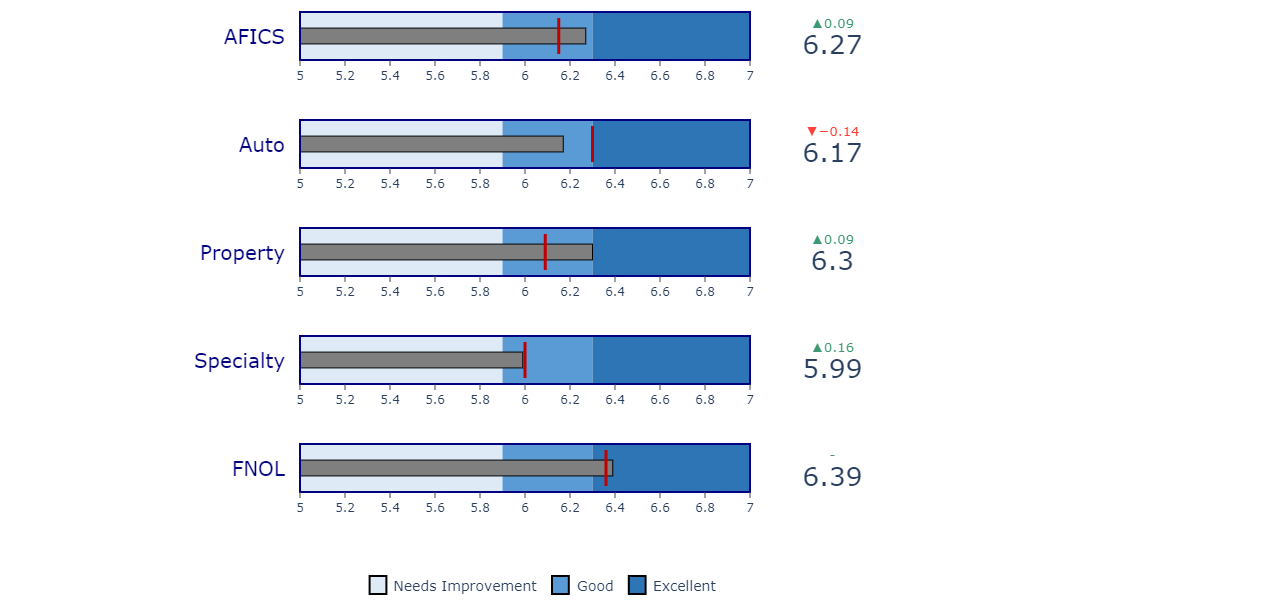

In [141]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "gauge",  value = 1,
    domain = {'x': [0.308, 0.322 ], 'y': [0.01, 0.04]},
    title = {"text" :"",
             'align': 'center'
             
            },
     gauge = {
        'shape': "bullet",
        'axis': {'range': [0, 1]
                },
        'bordercolor': 'black',
        'borderwidth': 2,
        'bar': {'color': "#DEEBF7", 'thickness': 1
               }}))
fig.update_traces(
    gauge={
        "axis": {
            'showticklabels':False,
            'ticks':""
        }
    }
)

fig.add_trace(go.Indicator(
    mode = "gauge",  value = 1,
    domain = {'x': [0.460, 0.474], 'y': [0.01, 0.04]},
    title = {"text" :"Needs Improvement   ",
             'align': 'center',
            'font': {'size':14}
            },
     gauge = {
        'shape': "bullet",
        'axis': {'range': [0, 1]
                },
        'bordercolor': 'black',
        'borderwidth': 2,
        'bar': {'color': "#5B9BD5", 'thickness': 1
               }}))
fig.update_traces(
    gauge={
        "axis": {
            'showticklabels':False,
            'ticks':""
        }
    }
)

fig.add_trace(go.Indicator(
    mode = "gauge",  value = 1,
    domain = {'x': [0.524, 0.538], 'y': [0.01, 0.04]},
    title = {"text" :"Good   ",
             'align': 'center',
            'font': {'size':14}
             
            },
     gauge = {
        'shape': "bullet",
        'axis': {'range': [0, 1]
                },
        'bordercolor': 'black',
        'borderwidth': 2,
        'bar': {'color': "#2E75B6", 'thickness': 1
               }}))
fig.update_traces(
    gauge={
        "axis": {
            'showticklabels':False,
            'ticks':""
        }
    }
)


fig.add_trace(go.Indicator(
    mode = "gauge",
    domain = {'x': [0.597, 0.611], 'y': [0.01, 0.04]},
    title = {"text" :"Excellent",
             'align': 'center',
            'font': {'size':14}
             
            },
     gauge = {
        'shape': "bullet",
        'axis': {'range': [0, 1]
                },
        'bordercolor': 'white',
        'bar': {'color': "white", 'thickness': 1
               }}))
fig.update_traces(
    gauge={
        "axis": {
            'showticklabels':False,
            'ticks':""
        }
    }
)

#Enterprise
fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = 6.27,
    delta = {'reference': 6.18, 'position': 'top'},
    domain = {'x': [0.25, 0.75], 'y': [0.90, 0.98]},
    title = {'text' :'AFICS', 
             'font': {'color':'navy'},
             'align': 'center'
            },
    gauge = {
        'shape': "bullet",
        'axis': {'range': [5, 7],
                'nticks':11
                },
        'bordercolor': 'navy',
        'borderwidth': 2,
        'threshold': {
            'line': {'color': "#C00000", 'width': 3},
            'thickness': 0.75, 'value': 6.15},
        'steps': [
            {'range': [5, 5.9], 'color': "#DEEBF7"},
            {'range': [5.9, 6.3], 'color': "#5B9BD5"},
            {'range': [6.3, 7], 'color': "#2E75B6"}       
        ],
        'bar': {'color': "#7F7F7F", 'thickness': 0.33, 
                'line': {'color': "black", 'width': 1}
               }}))

list1 = [5,6,7]


#Auto
fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = 6.17,
    delta = {'reference': 6.31, 'position': 'top'},
    domain = {'x': [0.25, 0.75], 'y': [0.72, 0.80]},
    title = {'text' :'Auto', 
             'font': {'color':'navy'},
             'align': 'center'
            },
    gauge = {
        'shape': "bullet",
        'axis': {'range': [5, 7],
                'nticks':11},
        'bordercolor': 'navy',
        'borderwidth': 2,
        'threshold': {
            'line': {'color': "#C00000", 'width': 3},
            'thickness': 0.75, 'value': 6.3},
        'steps': [
            {'range': [5, 5.9], 'color': "#DEEBF7"},
            {'range': [5.9, 6.3], 'color': "#5B9BD5"},
            {'range': [6.3, 7], 'color': "#2E75B6"}               
        ],
        'bar': {'color': "#7F7F7F", 'thickness': 0.33,
                'line': {'color': "black", 'width': 1}
               }}))

#Property
fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = 6.30,
    delta = {'reference': 6.21, 'position': 'top'},
    domain = {'x': [0.25, 0.75], 'y': [0.540, 0.620]},
    title = {'text' :'Property', 
             'font': {'color':'navy'},
             'align': 'center'
            },
    gauge = {
        'shape': "bullet",
        'axis': {'range': [5, 7],
                 'nticks':11
                },
        'bordercolor': 'navy',
        'borderwidth': 2,
          'threshold': {
            'line': {'color': "#C00000", 'width': 3},
            'thickness': 0.75, 'value': 6.09},
        'steps': [
            {'range': [5, 5.9], 'color': "#DEEBF7"},
            {'range': [5.9, 6.3], 'color': "#5B9BD5"},
            {'range': [6.3, 7], 'color': "#2E75B6"}             
        ],
        'bar': {'color': "#7F7F7F", 'thickness': 0.33,
                'line': {'color': "black", 'width': 1}
               }}))


#Specialty
fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = 5.99,
    delta = {'reference': 5.83, 'position': 'top'},
    domain = {'x': [0.25, 0.75], 'y': [0.360, 0.440]},
    title = {'text' :'Specialty', 
             'font': {'color':'navy'},
             'align': 'center'
            },
    gauge = {
        'shape': "bullet",
        'axis': {'range': [5, 7],
                'nticks':11
                },
        'bordercolor': 'navy',
        'borderwidth': 2,
              'threshold': {
            'line': {'color': "#C00000", 'width': 3},
            'thickness': 0.75, 'value': 6},
        'steps': [
           {'range': [5, 5.9], 'color': "#DEEBF7"},
            {'range': [5.9, 6.3], 'color': "#5B9BD5"},
            {'range': [6.3, 7], 'color': "#2E75B6"}            
        ],
        'bar': {'color': "#7F7F7F", 'thickness': 0.33,
                'line': {'color': "black", 'width': 1}
               }}))


#Shared Ops
fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = 6.39,
    delta = {'position': 'top'},
    domain = {'x': [0.25, 0.75], 'y': [0.180, 0.260]},
    title = {'text' :'FNOL', 
             'font': {'color':'navy'},
             'align': 'center'
            },
    gauge = {
        'shape': "bullet",
        'axis': {'range': [5, 7],
                 'nticks':11
                },
        'bordercolor': 'navy',
        'borderwidth': 2,      
        'threshold': {
            'line': {'color': "#C00000", 'width': 3},
            'thickness': 0.75, 'value': 6.36},
        'steps': [
            {'range': [5, 5.9], 'color': "#DEEBF7"},
            {'range': [5.9, 6.3], 'color': "#5B9BD5"},
            {'range': [6.3, 7], 'color': "#2E75B6"}           
        ],
        'bar': {'color': "#7F7F7F", 'thickness': 0.33,
                'line': {'color': "black", 'width': 1}
               }}))
fig.update_layout(
    height = 600 , 
    width = 1000,
    margin = {'t':0, 'b':0, 'l':0},
     legend= {
          "x": 0.8, 
          "y": 0.1
     }
)

            

fig.show()

In [163]:
fig.write_image('bullet_chart.png')

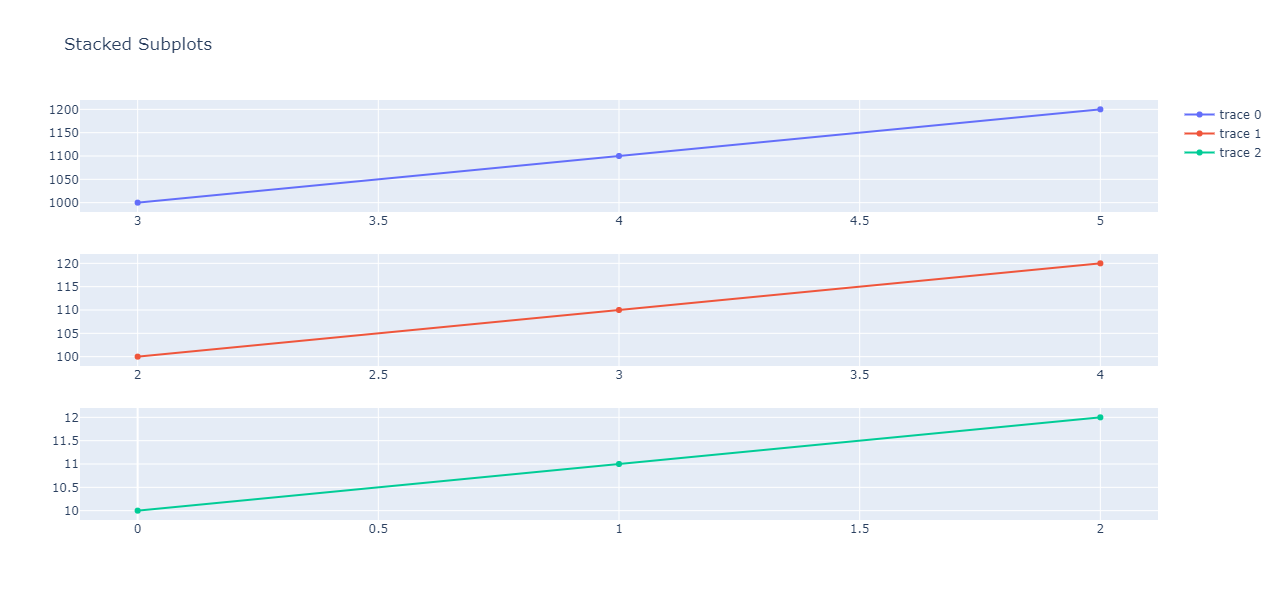

In [124]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
    x=[3, 4, 5],
    y=[1000, 1100, 1200],
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=[2, 3, 4],
    y=[100, 110, 120],
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=[0, 1, 2],
    y=[10, 11, 12]
), row=3, col=1)

fig.update_layout(height=600, width=600, title_text="Stacked Subplots")
fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
    x=[3, 4, 5],
    y=[1000, 1100, 1200],
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=[2, 3, 4],
    y=[100, 110, 120],
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=[0, 1, 2],
    y=[10, 11, 12]
), row=3, col=1)

fig.update_layout(height=600, width=600, title_text="Stacked Subplots")
fig.show()

In [139]:
sheetname2='All_OpCo'
df2=pd.read_excel(r'All_OpCo_Channeling_FC.xlsx',sheet_name=sheetname2)

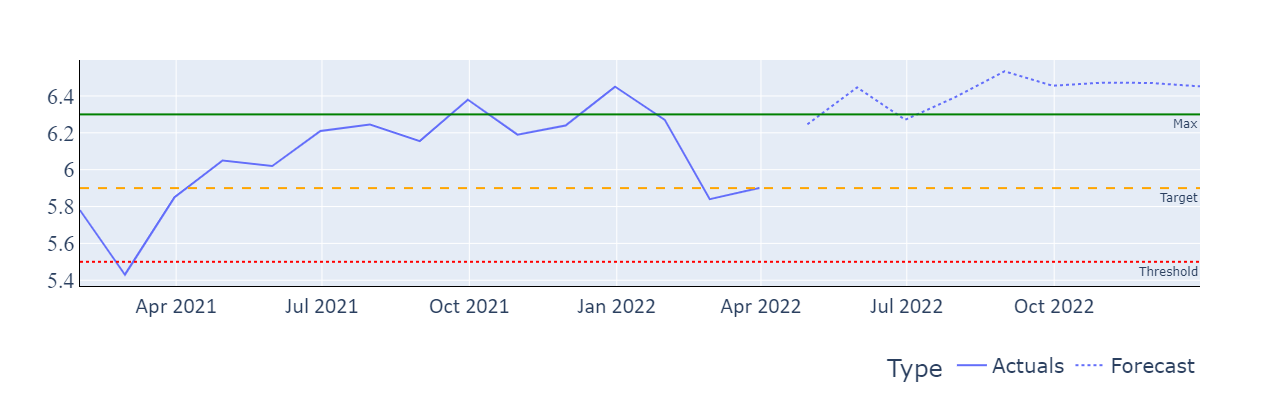

In [152]:
fig = px.line(
    df2, 
    x = 'date',
    y = 'AFICS',
    line_dash='Type',
    width=1000, height=400
)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.45,
    xanchor="right",
    x=1,
    font = dict(
        size=20)
)),
fig.update_layout(
    title_x=0.5)
fig.update_layout(
    title={
        'font': dict(
        size=30

    )
    }
    )
fig.update_layout(
    xaxis_title = '', # title for x axis 
    yaxis_title = '', # title for y axis 
    xaxis = dict(           # attribures for x axis 
        showline = True,
        showgrid = True,
        linecolor = 'black',
        
        tickfont = dict(
            family = 'Calibri',
            size = 22
        )
    ),
    yaxis = dict(           # attribures for y axis 
        showline = True,
        showgrid = True,
        linecolor = 'black',
        tickfont = dict(
            family = 'Times New Roman',
            size = 22
        ) 
    )
)
fig.add_hline(y=5.5, line_dash="dot",
              annotation_text="Threshold",
              line_color='red',
             annotation_position="bottom right")
fig.add_hline(y=5.9, line_dash="dash",
              annotation_text="Target",
              line_color='orange',
             annotation_position="bottom right")
fig.add_hline(y=6.3, line_dash="solid",
              annotation_text="Max",
              line_color='green',
             annotation_position="bottom right")